In [1]:
from timing_games_package import Simulation
from timing_games_package.Configuration import sim_config_init
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
from matplotlib import style
import numpy as np
import pandas as pd
plt.style.use('default')

# config parameters

`game_type`: game type. It could be 'fear' or 'greed'.
- `game_type` is optional for only fear or only greed game. For example, if you specify `game_type='greed'` while $\gamma \leq \rho + 2/3$, the code will override game type you specified and force it to 'fear' instead.

`lgr`: lambda/gamma/rho params: (lambda, gamma, rho)
- `lgr=(10,1.1,0.5)` means (lambda, gamma, rho)=(10, 1.1, 0.5)

||game type|
|--|--|
|$\gamma \leq \rho + 2/3$|only fear game|
|$\rho + 2/3 < \gamma < \rho + 4/3 $|fear or greed equilibrium|
|$\gamma \geq \rho + 4/3 $|only greed|


`sampling`: number of players to sample. Give each player an array of random other players to sample, default to None.
- `sampling=None` means players could observe all other players' moves.
- `sampling=5` means players could only observe 5 other players' moves.

`purification`: idiosyncratic shifts of perceived landscape


`trembling`: trembling range (set to 0 to have no effect. It could be 0.1, 0.2, etc


`theta`: moving chance is theta.
- `theta=None` means moving chance is 100%
- `theta=0.05` means moving chance is 5%

`bandwidth`: smoothing bandwidth (set None to disable). It could be 0.1, 0.2, etc

`asynchronous`: game synchronicity
- `asynchronous=True` means one player is selected with the chance to move. (jump frequencies proportional to regret)
- `asynchronous=False` means all players move simultaneously.


Example:
If `asynchronous=True`, `theta=0.05`, and `num_bots=5`, 5 players' payoffs were [4,8,9,9,10] and best payoff was 10, then the probability of the player is selected would be [0.6, 0.2, 0.1, 0.1, 0] next period. If one player is selected, the moving chance is 5%. (5% chance to jump to the best position, 95% chance stay at original position.)

`num_bots`: number of bots

`game_length`: game length. Simulation periods

# selected parameters based on theory

|$\lambda$|$\gamma$|$\rho$|game type|rush size|rush time|slow play on|Nah payoff|
|--|--|--|--|--|--|--|--|
|10|1.1|0.5| only fear|0.45|1.26|[1.26,10]| 27.545| 
|10|1.5|0.5| fear equilibrium|0.75|5.51|[5.51,10]| 100.90|
|10|1.5|0.5| greed equilibrium|0.75|14.49|[10,14.49]| 101|
|10|2|0.5| only greed|0.375|15.97|[10,15.97]| 101|
|10|2.5|2| only fear|0.375|6.69|[6.69,10]| 90.9| 
|10|3|2| fear equilibrium|0.75|8.25|[8.25,10]| 101|
|10|3|2| greed equilibrium|0.75|11.74|[10,11.74]| 101|
|10|3.6|2| only greed|0.3|12.85|[10,12.85]| 101|

In [23]:
history = {}
round_idx = 0

# Set up simulation configuration
sim_config = sim_config_init(
    game_type='greed',
    lgr=(10,3.6,2),
    sampling=None, 
    purification=None, 
    trembling=0., 
    theta=None, 
    bandwidth=None,
    asynchronous=True,
    num_bots=20,
    game_length=100,
)



# Simulate players' initial strategies and payoffs
strategies, sample_sets = Simulation.initialize_player_strategies(sim_config)
x, y, strat_x, strat_y, strategies_y, quantile = Simulation.calculate_payoff(sim_config, strategies, sample_sets)

# Log data for the initial round
# history = data_logging(['strategies', 'x', 'y', 'strat_x', 'strat_y'], round_idx, history) # To Do
history['strategies', round_idx] = strategies.copy()
history['x', round_idx] = x
history['y', round_idx] = y
history['strat_x', round_idx] = strat_x
history['strat_y', round_idx] = strat_y
history['strategies_y', round_idx] = strategies_y
history['quantile', round_idx] = quantile
history['selected_player_index', round_idx] = None

# Iterate simulation to update players' strategies and payoff
max_game_length = sim_config['game_length']

if (sim_config['gamma'] <= sim_config['rho'] + 2/3) or (sim_config['gamma'] >= sim_config['rho'] + 4/3):
    game_type_specification = 'only ' + sim_config['game_type']
else:
    game_type_specification = sim_config['game_type'] + ' equilibrium'    
print('This is {} game'.format(game_type_specification))
print('----------------Simulation Start----------------')
print('Period 0 done')
while round_idx < max_game_length:
    round_idx += 1
    strategies, selected_player_index = Simulation.update_player_strategies(x, y, strategies,strategies_y, sample_sets, sim_config)
    x, y, strat_x, strat_y, strategies_y, quantile = Simulation.calculate_payoff(sim_config, strategies, sample_sets)

    # Log data for the round
    history['strategies', round_idx] = strategies.copy()
    history['x', round_idx] = x
    history['y', round_idx] = y
    history['strat_x', round_idx] = strat_x
    history['strat_y', round_idx] = strat_y
    history['strategies_y', round_idx] = strategies_y
    history['quantile', round_idx] = quantile
    history['selected_player_index', round_idx] = selected_player_index
    if round_idx%20 == 0:
        print('Period {} done'.format(round_idx))
    
print('----------------Simulation Finished----------------')

print('The initial strategies are {}'.format(history['strat_x', 0]))
print('The initial payoffs are {}'.format(history['strat_y', 0]))



This is only greed game
----------------Simulation Start----------------
Period 0 done
Period 20 done
Period 40 done
Period 60 done
Period 80 done
Period 100 done
----------------Simulation Finished----------------
The initial strategies are [10.   11.03 11.43 11.72 11.94 12.12 12.27 12.4  12.51 12.6  12.67 12.73
 12.78 12.82 12.85 12.85 12.85 12.85 12.85 12.85]
The initial payoffs are [101.0, 101.01483336805556, 101.01666458333331, 101.00327333333333, 101.01781555555557, 101.02929999999999, 101.03881791666663, 101.02715277777776, 101.01322666666665, 101.01350000000002, 101.04180902777779, 101.05035697916665, 101.04423333333338, 101.02772402777772, 101.03115552662038, 101.03115552662038, 101.03115552662038, 101.03115552662038, 101.03115552662038, 101.03115552662038]


<IPython.core.display.Javascript object>


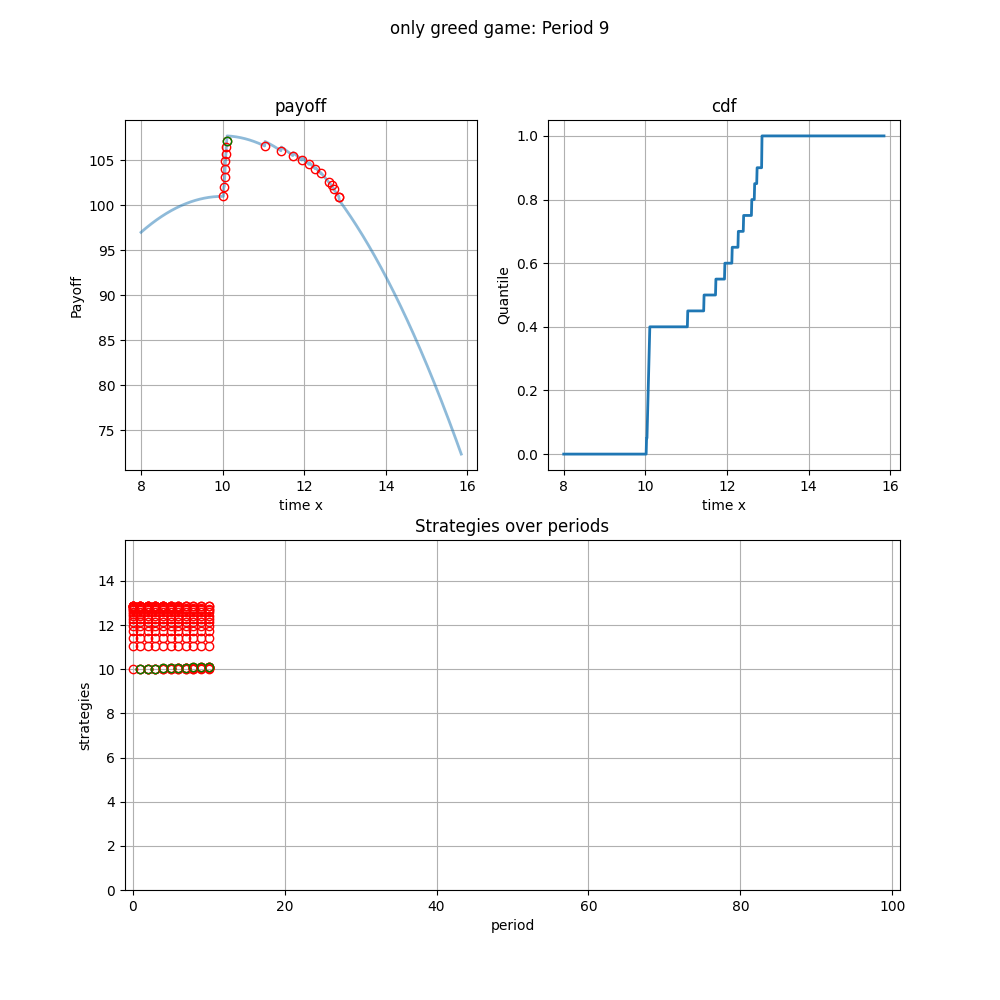

KeyboardInterrupt: 

In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(round_idx+1):
    ax1.clear()
    ax1.plot(history['x', i], history['y', i], alpha=0.5, linewidth = '2')
    ax1.plot(history['strat_x', i], history['strat_y', i], 'ro', fillstyle='none')
    if history['selected_player_index', i] is not None:
        ax1.plot(history['strategies', i][history['selected_player_index', i]], 
             history['strategies_y', i][history['selected_player_index', i]], 'go', fillstyle='none')
#     ax1.set_ylim([0, sim_config['lambda']**2+100])
    ax1.set_xlabel('time x')
    ax1.set_ylabel('Payoff')
    ax1.set_title('payoff')
    ax1.grid()
    
    ax2.clear()
    ax2.plot(history['x', i], history['quantile', i], linewidth = '2')
    ax2.set_xlabel('time x')
    ax2.set_ylabel('Quantile')
    ax2.set_title('cdf')
    ax2.grid()
    
    plot_round = np.array([i]*len(history['strategies', 0]))
    ax3.plot(plot_round, history['strategies', i], 'ro', fillstyle='none')
    if history['selected_player_index', i] is not None:
        ax3.plot(i, history['strategies', i][history['selected_player_index', i]], 'go', fillstyle='none')
    ax3.set_xlim([-1, round_idx+1])
    ax3.set_ylim([0, sim_config['xmax']])
    ax3.set_xlabel('period')
    ax3.set_ylabel('strategies')
    ax3.set_title('Strategies over periods')
    ax3.grid()

    plt.pause(0.3)
    fig.suptitle(game_type_specification + ' game: Period ' + str(i))
    fig.canvas.draw()
print('Done')

In [25]:
print(history['strategies', 100])

[10.38 10.39 10.38 10.38 10.38 10.39 10.38 10.39 10.38 10.39 10.39 10.38
 10.39 10.38 10.38 10.38 10.37 10.39 10.37 10.39]
